In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_rows', 15)

In [239]:
df = pd.read_csv("./indicadores.csv")
df

,Periodo,Valor
0,2022/07,111.274552
1,2022/06,112.797501
2,2022/05,114.442424
3,2022/04,109.529866
4,2022/03,111.940152
...,...,...
350,1993/05,63.612900
351,1993/04,61.865984
352,1993/03,63.943249
353,1993/02,61.022521


Reverse the dataframe to have the data in ascending order.

In [240]:
df = df.iloc[::-1]


Get logaritmic values.

In [241]:
df["log"] = np.log(df["Valor"])

C:\Users\bobad\AppData\Local\Temp\ipykernel_18448\1250515337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log"] = np.log(df["Valor"])


Get seasonal difference

In [242]:
df["seasonal difference"] = np.log(df["Valor"]).diff(12)
df["seasonal difference"].iloc[0] = np.log(df["Valor"].iloc[0])

C:\Users\bobad\AppData\Local\Temp\ipykernel_18448\2109982779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seasonal difference"] = np.log(df["Valor"]).diff(12)
C:\Users\bobad\AppData\Local\Temp\ipykernel_18448\2109982779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["seasonal difference"].iloc[0] = np.log(df["Valor"].iloc[0])


Drop nans.

In [243]:

df.drop(df.index[0:12], inplace=True)

C:\Users\bobad\AppData\Local\Temp\ipykernel_18448\2210120469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[0:12], inplace=True)


In [244]:
df

,Periodo,Valor,log,seasonal difference
342,1994/01,63.029268,4.143599,0.042483
341,1994/02,62.733156,4.138890,0.027647
340,1994/03,65.790275,4.186472,0.028476
339,1994/04,65.891716,4.188013,0.063042
338,1994/05,66.858802,4.202583,0.049767
...,...,...,...,...
4,2022/03,111.940152,4.717964,0.003661
3,2022/04,109.529866,4.696197,0.013414
2,2022/05,114.442424,4.740072,0.021001
1,2022/06,112.797501,4.725594,0.014522


Auto-Correlation Function (ACF) plot

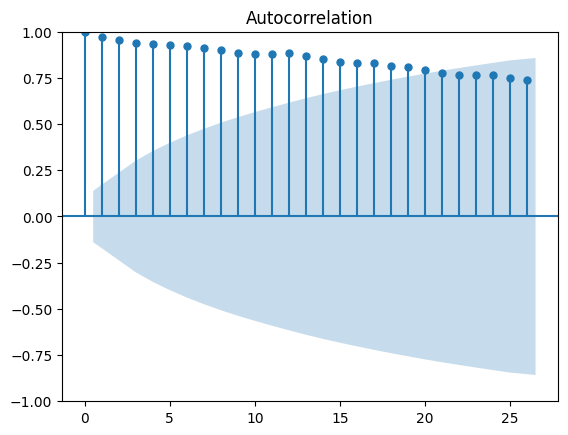

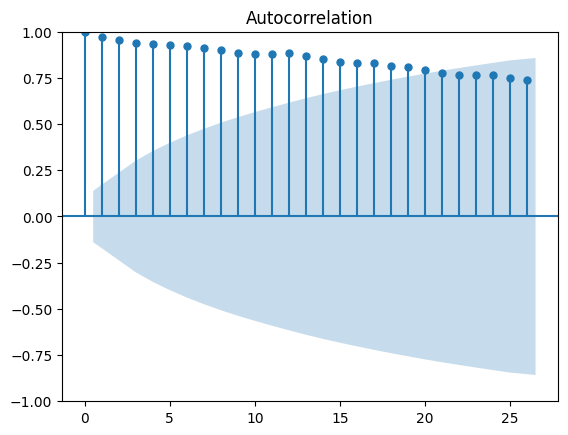

In [245]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Valor'], alpha=0.01)

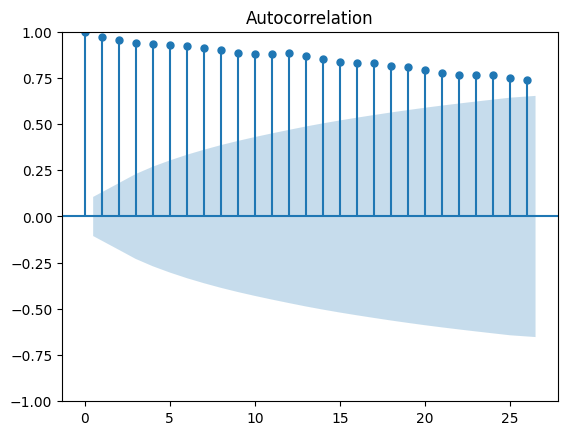

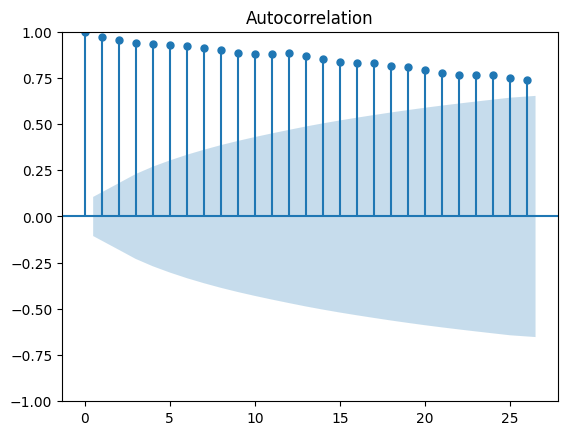

In [246]:
plot_acf(df['Valor'], alpha=0.05)

ACF values

In [247]:
from statsmodels.tsa.stattools import acf
print(acf(df['seasonal difference']))

[ 1.          0.79047642  0.64147879  0.53244045  0.40779488  0.34500971
  0.27898463  0.18243636  0.1276219   0.05698009 -0.0537973  -0.14036262
 -0.23316974 -0.17860551 -0.114916   -0.09039653 -0.05635981 -0.02775208
 -0.05310755 -0.05756198 -0.02919748 -0.04619563 -0.04647523 -0.02265412
 -0.08392988 -0.06738621]


Partial Auto-Correlation Function (PACF) plot

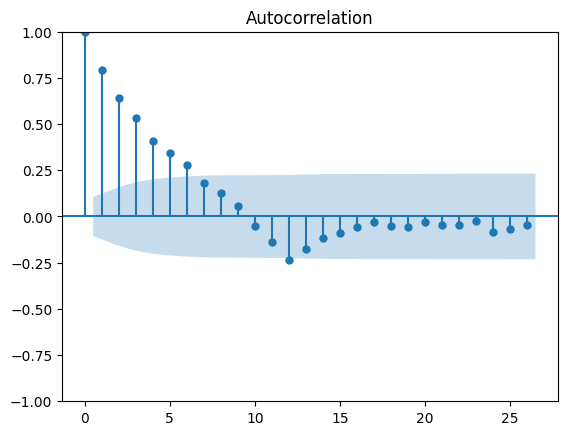

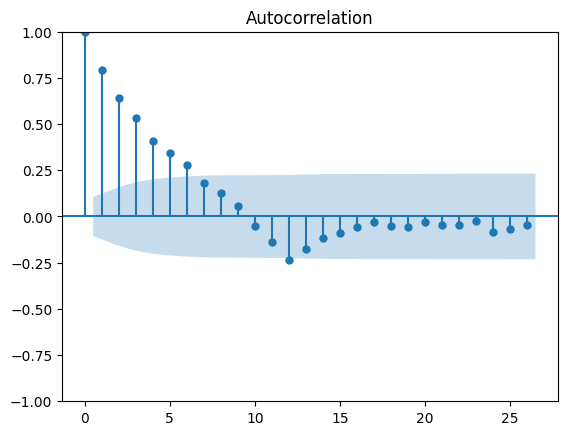

In [248]:

plot_acf(df['seasonal difference'])

C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


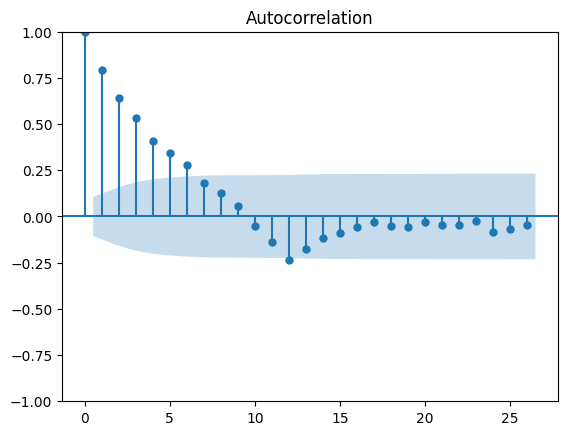

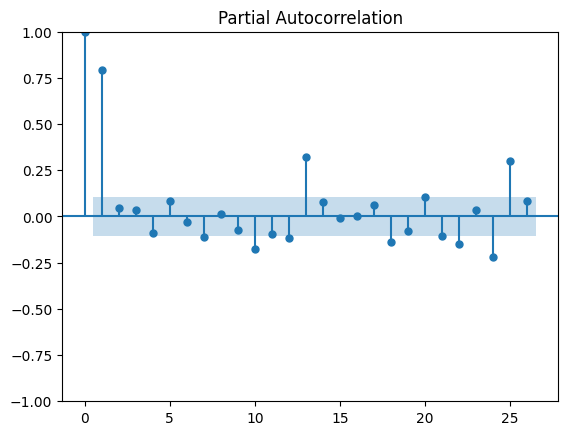

In [249]:
plot_acf(df['seasonal difference'])

plot_pacf(df['seasonal difference'])
plt.show()

In [250]:
df = df.reset_index()

Augmented Dickey-Fuller test

In [251]:
from statsmodels.tsa.stattools import adfuller
#perform augmented Dickey-Fuller test on seasonal difference.
adfuller(df['log'])

(-2.1821766485060587,
 0.21277778054821755,
 17,
 325,
 {'1%': -3.450632157720528,
  '5%': -2.870474482366864,
  '10%': -2.5715301325443787},
 -1490.332816699186)

ARIMA MODEL

In [252]:
# Import arima model
from statsmodels.tsa.arima.model import ARIMA

# fit model with seasonal difference
model = ARIMA(df["log"], order=(1,0,1), seasonal_order=(0,1,1,12))
res = model.fit()

print(res.summary())

                                    SARIMAX Results                                     
Dep. Variable:                              log   No. Observations:                  343
Model:             ARIMA(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 772.748
Date:                          Wed, 23 Nov 2022   AIC                          -1537.496
Time:                                  16:44:39   BIC                          -1522.288
Sample:                                       0   HQIC                         -1531.431
                                          - 343                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9882      0.010     95.255      0.000       0.968       1.009
ma.L1         -0.2359      0.025     -9.391      0.

confidence intervals and standard error ARIMA model

SARIMA MODEL

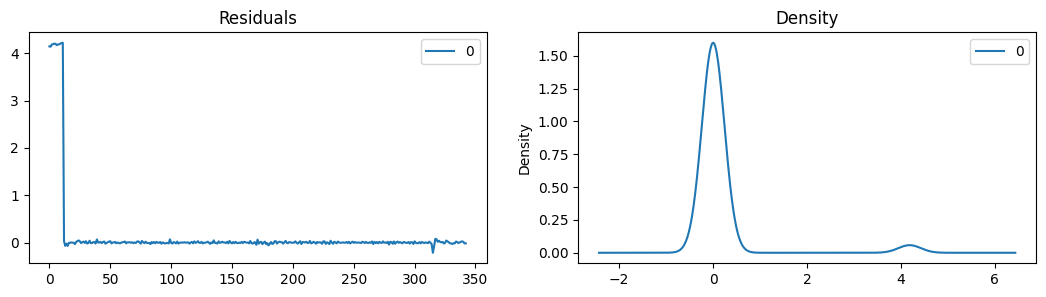

In [253]:
# Plot residual errors
residuals = pd.DataFrame(res.resid)
fig, ax = plt.subplots(1,2, figsize=(13, 3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [254]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df["log"],
                                order=(1,0,1),
                                seasonal_order=(0,1,1,12),
                                trend="c",
                                simple_differencing=True)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           DS12.log   No. Observations:                  331
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 778.343
Date:                            Wed, 23 Nov 2022   AIC                          -1546.686
Time:                                    16:44:41   BIC                          -1527.675
Sample:                                         0   HQIC                         -1539.104
                                            - 331                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.000      3.338      0.001       0.001       0.003
ar.L1          0.9217      0.023   

C:\Users\bobad\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostic Plots

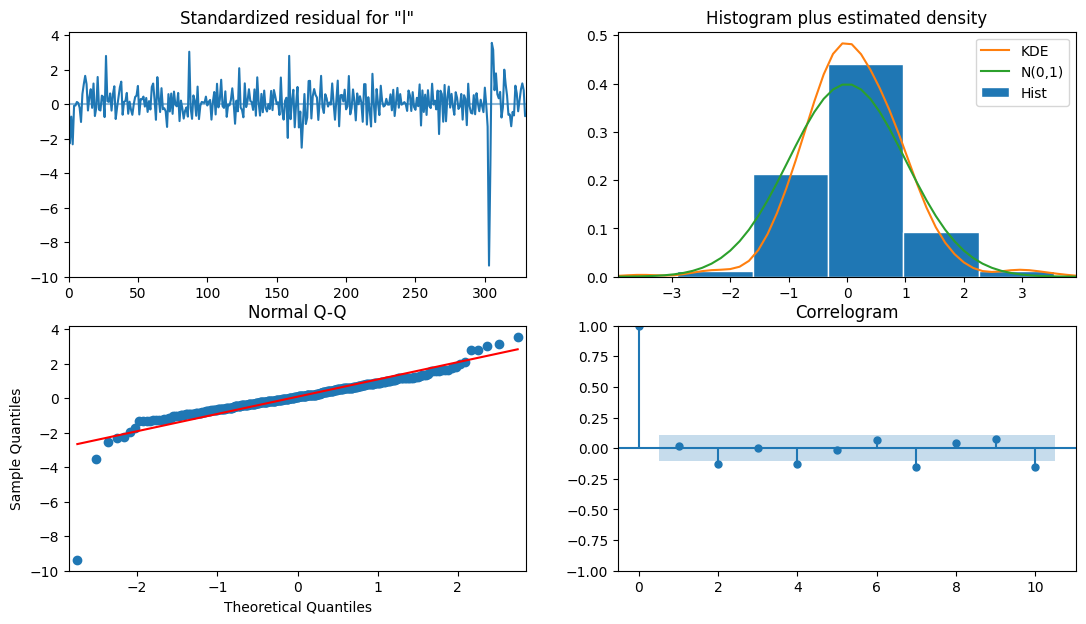

In [255]:
res.plot_diagnostics(figsize=(13,7))
plt.show()

FORECASTING

In [256]:
prediction = pd.DataFrame(res.predict(345, 360))
prediction['exp'] = np.exp(prediction['predicted_mean'])
prediction

,predicted_mean,exp
345,4.736727,114.060251
346,4.753165,115.950645
347,4.740084,114.443857
348,4.704985,110.496623
349,4.679730,107.741010
...,...,...
356,4.688741,108.716252
357,4.738685,114.283843
358,4.755100,116.175258
359,4.741997,114.662932


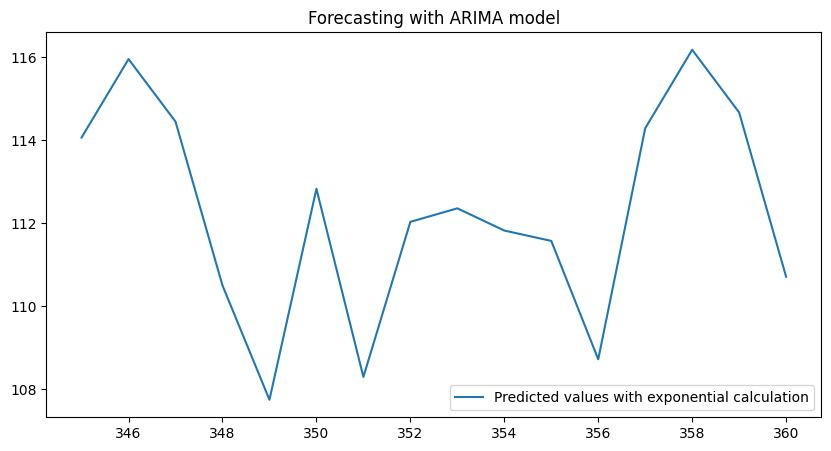

In [257]:
fig,ax = plt.subplots(figsize=(10,5))  
plt.title("Forecasting with ARIMA model")
prediction['exp'].plot()
plt.legend(['Predicted values with exponential calculation'])

Prediction using SARIMAX MODEL

In [260]:
prediction2 = pd.DataFrame(results.predict(345, 360))
prediction2['exp'] = np.exp(prediction2['predicted_mean'])
prediction2

,predicted_mean,exp
357,0.038953,1.039722
358,0.037480,1.038191
359,0.036122,1.036783
360,0.034871,1.035486
361,0.033717,1.034292
...,...,...
368,0.027812,1.028202
369,0.027211,1.027585
370,0.026657,1.027016
371,0.026147,1.026492


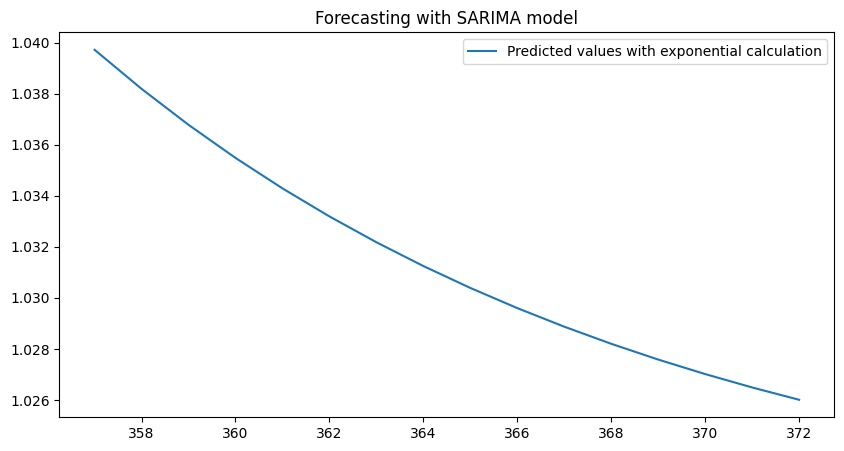

In [261]:
fig,ax = plt.subplots(figsize=(10,5))  
plt.title("Forecasting with SARIMA model")
prediction2['exp'].plot()
plt.legend(['Predicted values with exponential calculation'])